# Proyecto Final
# Reconocimiento de Patrones
# Ronny Jimenez / Fabricio Quirós

## Introducción

El presente Notebook pretende mostrar los pasos que se requirieron para entrenar un set de datos bajo el framework de Keras y utilizando una Red Neuronal Convolucional. 

Los datos que se utilzan son los de CIFAR10: un conjunto de imagenes pequeñas, de 32x32 pixeles, que consiste en 50000 imagenes a color para el entrenamiento y 10000 imagenes para validación. Las imagenes para el entrenamiento están etiquetadas sobre 10 categorias:

    avión:0
    vehículos: 1
    aves : 2
    gatos : 3
    venados : 4
    perros : 5
    ranas : 6
    caballos : 7
    barcos : 8
    camiones : 9

de esta forma, cada categoria tiene une etiqueta del 0-9. 

Para incluir esta base de datos es necesaria la linea

    from keras.datasets import cifar10
    
Un ejemplo de este data set se muestra a continuacion

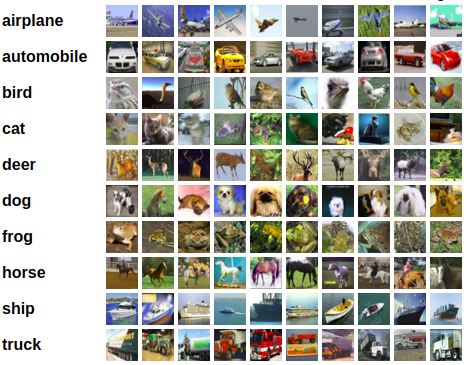

In [1]:
# Import useful libraries
import os, keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time

Using TensorFlow backend.


In [2]:
# Hyperparameters definition
# -- first results --
#batch_size = 32
#epochs = 30
# -- second results -- 
batch_size = 64
epochs = 20
num_classes = 10
num_predictions = 20

In [3]:
matplotlib.style.use('seaborn')

In [4]:
# Load CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

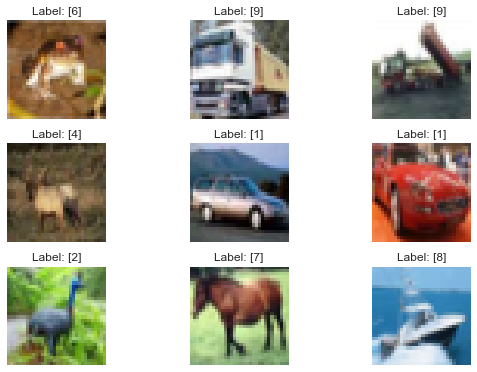

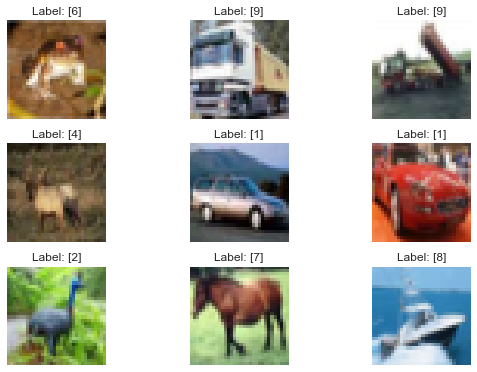

In [5]:
# Images display
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], interpolation='none')
  plt.title("Label: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [6]:
# Let's print the actual data shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [7]:
# Data size: 32x32
img_rows , img_cols = 32, 32

#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).

if k.image_data_format() == 'channels_first':
    print("It is 3D")
    X_train = X_train.reshape(X_train.shape[0], 3, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    print("Not 3D")
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#normalization
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Not 3D
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [8]:
print(np.unique(y_train, return_counts=True))

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [9]:
#model building
model = Sequential()
model.add(Conv2D(32, (3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),
                 padding='same',
                activation='relu'))
model.add(Conv2D(64, (3, 3),
                activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,
         activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,
         activation='softmax'))

# initiate RMSprop optimizer (first results)
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
# initiate Nadam optimizer (second results)
opt = keras.optimizers.Nadam()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
# Let's train the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [11]:
#model training
start = time.time()

model_log = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)

end = time.time()
m = (end - start)/60
m = round(m, 2)
s = (end - start)
s = round(s, 2)

print(f"Training time: {m} min / {s} sec")

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1266s 25ms/step - loss: 1.8091 - acc: 0.3341 - val_loss: 1.5025 - val_acc: 0.4635
Epoch 2/20
50000/50000 [==============================] - 1203s 24ms/step - loss: 1.3023 - acc: 0.5347 - val_loss: 1.1548 - val_acc: 0.5867
Epoch 3/20
50000/50000 [==============================] - 1196s 24ms/step - loss: 1.1205 - acc: 0.6052 - val_loss: 1.0510 - val_acc: 0.6250
Epoch 4/20
50000/50000 [==============================] - 1201s 24ms/step - loss: 1.0091 - acc: 0.6438 - val_loss: 0.9652 - val_acc: 0.6697
Epoch 5/20
50000/50000 [==============================] - 1222s 24ms/step - loss: 0.9381 - acc: 0.6704 - val_loss: 0.9345 - val_acc: 0.6781
Epoch 6/20
50000/50000 [==============================] - 1188s 24ms/step - loss: 0.8830 - acc: 0.6889 - val_loss: 0.8578 - val_acc: 0.7048
Epoch 7/20
50000/50000 [==============================] - 1193

In [12]:
# Score trained model.
start = time.time()

score = model.evaluate(X_test, y_test, verbose=0)

end = time.time()
m = (end - start)/60
m = round(m, 2)
s = (end - start)
s = round(s, 2)

print('Test loss:', score[0])
print('Test accuracy:', score[1]*100, '%')

print(f"Test time: {m} min / {s} sec")

Test loss: 0.6981047269821167
Test accuracy: 76.41 %
Test time: 1.21 min / 72.71 sec


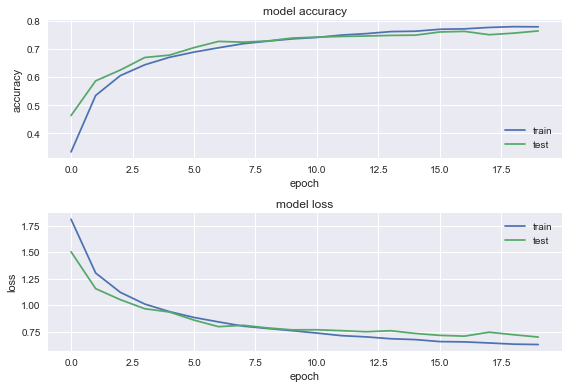

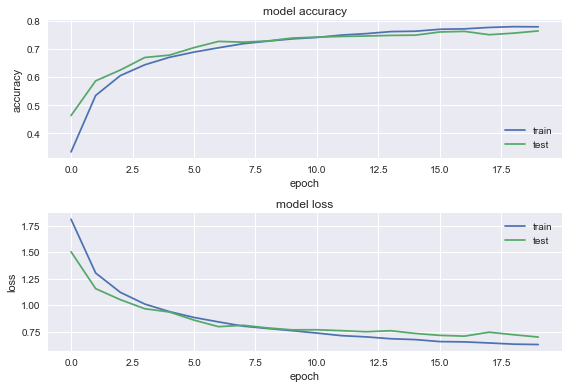

In [13]:
# Plotting metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

## Results

__First results__
- Hyperparameters: batch_size = 32, epochs = 30, input_shape = 1 channel
- Optimizer used: RMSprop (Keep	a moving average of the squared	gradient for each weight).
- Training:<br>
-- Training time: 651.38 min / 39082.93 sec<br>
-- loss: 0.6849 - acc: 0.7700 - val_loss: 0.6855 - val_acc: 0.7690

- Testing:<br>
-- Test time: 1.16 min / 69.57 sec<br>
-- Test loss: 0.6854564739227295<br>
-- Test accuracy: 76.9 %

__Second results__
- Hyperparameters: batch_size = 64, epochs = 20, input_shape = 3 channels (reshaping)
- Optimizer: Nadam (Much like Adam is essentially RMSprop with momentum, Nadam is Adam RMSprop with Nesterov momentum).
- Training:<br>
-- Training time: 421.31 min / 25278.89 sec<br>
-- loss: 0.6276 - acc: 0.7787 - val_loss: 0.6981 - val_acc: 0.7641

- Testing:<br>
-- Test time: 1.21 min / 72.71 sec<br>
-- Test loss: 0.6981047269821167<br>
-- Test accuracy: 76.41 %

__Third results__
- Increase number of epochs to 60.